In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

Using TensorFlow backend.


In [20]:
train_labels = np.array(pd.read_csv("./datasets/train_labels.csv", delimiter=",", header=0, index_col=0))[:-2000]
test_labels = np.array(pd.read_csv("datasets/train_labels.csv", delimiter=",", header=0, index_col=0))[-2000:]
train_images = np.load("datasets/train_images.npy", encoding="latin1")[:-2000][:,1]
test_images = np.load("datasets/train_images.npy", encoding="latin1")[-2000:][:,1]

In [26]:
# reshape images
def reshape(dataset):
    output = []
    for img in dataset:
        output.append(img.reshape(100,100))
    return np.array(output, dtype=int)

In [29]:
train_images = reshape(train_images)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

array(['shovel'], dtype=object)

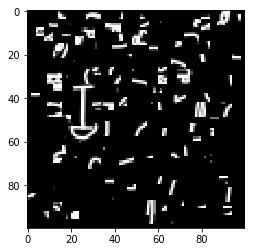

In [16]:
img = (train_images[0][1]).reshape(100,100)
plt.imshow(img,cmap='gray')
train_labels[0]

In [19]:
train_images[1][0]

1

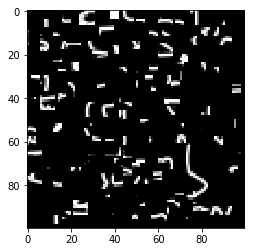

In [5]:
img = (train_images[15][1]).reshape(100, 100)
# pixel_str_list = map(str, pixel_list)
# print(pixel_list)
plt.imshow(img, cmap = 'gray')

In [7]:
cv.imwrite('test_img.jpg', img)
img = cv.imread('test_img.jpg',0)

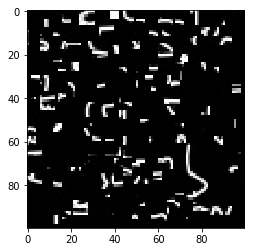

In [8]:
plt.imshow(img,'gray')

In [9]:
# ret,th1 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# blur = cv.GaussianBlur(img,(5,5),0)
# ret,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Gaussian Threshold, Mean Threshold, from tutorial on OpenCV

th1 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)